In [1]:
import pandas as pd
import os
import geopy as geo
import numpy as np
from folium.plugins import FastMarkerCluster
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

%matplotlib inline

## Importando a base e gerando um sample

In [2]:
os.getcwd()

'/home/rsa/Documentos/thesis/code'

In [3]:
df = pd.read_csv('/home/rsa/Documentos/database/2017-01-01.csv')

df = df.rename(columns={df.columns[0]: "DATAHORA", df.columns[1]:"ORDEM", df.columns[2]: "LINHA",df.columns[3]:"LATITUDE",df.columns[4]:"LONGITUDE",df.columns[5]: "VELOCIDADE"})
df = df.copy().drop_duplicates()
df['lat_long'] = list(zip(round(df.LATITUDE,5), round(df.LONGITUDE,5)))

print(df.shape)

(2881294, 7)


In [4]:
df.head()

,DATAHORA,ORDEM,LINHA,LATITUDE,LONGITUDE,VELOCIDADE,lat_long
0,12-31-2016 00:01:20,D53555,923.0,-22.883249,-43.495098,0.0,"(-22.88325, -43.4951)"
1,12-31-2016 00:02:54,C47599,361.0,-23.000521,-43.342079,33.0,"(-23.00052, -43.34208)"
2,12-31-2016 00:03:07,D53508,NaN,-22.884239,-43.495720,0.0,"(-22.88424, -43.49572)"
3,12-31-2016 00:13:46,D17009,868.0,-22.908449,-43.660641,23.0,"(-22.90845, -43.66064)"
4,12-31-2016 00:20:26,D53915,2310.0,-22.882469,-43.495861,45.0,"(-22.88247, -43.49586)"


In [5]:
print('Linha:', df.LINHA.nunique())
print('Ordem:', df.ORDEM.nunique())
print('LATITUDE:', df.LATITUDE.nunique())
print('LONGITUDE:', df.LONGITUDE.nunique())
print('DATAHORA:', df.DATAHORA.nunique())

Linha: 397
Ordem: 6494
LATITUDE: 90600
LONGITUDE: 112345
DATAHORA: 82591


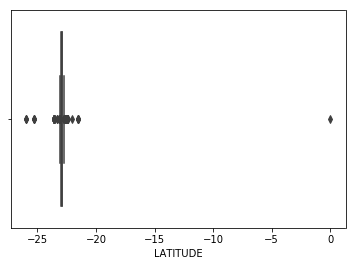

In [261]:
import seaborn as sns

# sns.boxplot(x=df311g.lng)

sns.boxplot(x=df.LATITUDE)

In [259]:
print(df.describe(include='all'))

                   DATAHORA    ORDEM    LINHA      LATITUDE     LONGITUDE  \
count               2881294  2881294  1867018  2.881294e+06  2.881294e+06   
unique                82591     6494      397           NaN           NaN   
top     01-01-2017 08:24:30   C47491    878.0           NaN           NaN   
freq                    100     2502    53428           NaN           NaN   
mean                    NaN      NaN      NaN -2.290339e+01 -4.335681e+01   
std                     NaN      NaN      NaN  5.630601e-02  1.509855e-01   
min                     NaN      NaN      NaN -2.597741e+01 -5.432600e+01   
25%                     NaN      NaN      NaN -2.295053e+01 -4.338890e+01   
50%                     NaN      NaN      NaN -2.290070e+01 -4.334839e+01   
75%                     NaN      NaN      NaN -2.287599e+01 -4.328511e+01   
max                     NaN      NaN      NaN  0.000000e+00  1.043624e+02   

          VELOCIDADE                lat_long  
count   2.881294e+06        

In [6]:
import datetime

#df1 = df[df.LINHA.isin(['476.0'])].copy()
#df1 = df.sample(1000000, random_state=1)
df1 = df.copy()
df1 = df1.rename(columns={'LATITUDE':'lat', 'LONGITUDE':'lng'})
#df1["ID"] = df1["ORDEM"].map(str) +"-"+ df1["LINHA"].map(str)

df1['DATAHORA'] = df1.apply(lambda x: datetime.datetime.strptime(x.DATAHORA,"%m-%d-%Y %H:%M:%S"),1)

df1 = df1[['DATAHORA', 'ORDEM', 'LINHA', 'lat_long', 'lat', 'lng']]
df1 = df1.drop_duplicates()
df1 = df1.sort_values(['LINHA', 'ORDEM', 'DATAHORA']).reset_index()
df1 = df1.drop(columns=['index'])

print(df1.shape)
df1.info()

(2881294, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881294 entries, 0 to 2881293
Data columns (total 6 columns):
DATAHORA    datetime64[ns]
ORDEM       object
LINHA       object
lat_long    object
lat         float64
lng         float64
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 131.9+ MB


In [7]:
df1.head()

,DATAHORA,ORDEM,LINHA,lat_long,lat,lng
0,2017-01-01 07:15:48,A01,1.0,"(-22.96402, -43.17378)",-22.964020,-43.173779
1,2017-01-01 07:17:33,A01,1.0,"(-22.96337, -43.17511)",-22.963369,-43.175110
2,2017-01-01 07:18:41,A01,1.0,"(-22.96481, -43.17703)",-22.964809,-43.177029
3,2017-01-01 07:19:37,A01,1.0,"(-22.96487, -43.17638)",-22.964870,-43.176380
4,2017-01-01 07:20:22,A01,1.0,"(-22.96485, -43.17579)",-22.964849,-43.175789


In [8]:
df1.groupby(df1.DATAHORA.dt.date).count()

,DATAHORA,ORDEM,LINHA,lat_long,lat,lng
DATAHORA,,,,,,
2016-12-31,11421,11421,8881,11421,11421,11421
2017-01-01,2869873,2869873,1858137,2869873,2869873,2869873


count    2.881294e+06
mean    -2.290339e+01
std      5.630601e-02
min     -2.597741e+01
25%     -2.295053e+01
50%     -2.290070e+01
75%     -2.287599e+01
max      0.000000e+00
Name: lat, dtype: float64


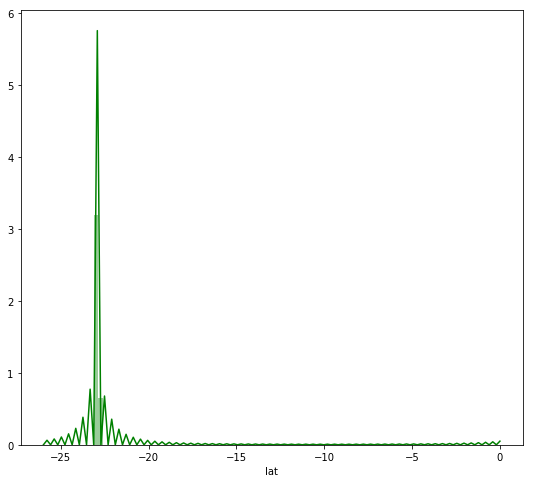

In [17]:
import seaborn as sns

print(df1['lat'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df1['lat'], color='g', bins=100, hist_kws={'alpha': 0.4});
#sns.distplot(df1['lng'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
### Visualizando os dados no mapa (Folium)

import folium
from folium.plugins import MousePosition, MiniMap
from folium.plugins import Draw

locs = [list(i) for i in df1.drop_duplicates(['lat_long'])['lat_long']]

brasil = folium.Map(
    #width=500,height=500,
    #tiles='OpenStreetMap',
    #tiles='cartodbpositron',
    tiles='CartoDB dark_matter',
    location=locs[0],    
    zoom_start=11
)

for i in locs: 
    folium.CircleMarker(
        location=i,
        color=['blue'],
        radius=1,
        weight=3
    ).add_to(brasil)

path = '/home/rsa/Documentos/thesis/plots_images/'

mouse = MousePosition(position='topright')
draw = Draw(export=True)
minimap = MiniMap(toggle_display=True, tile_layer='CartoDB dark_matter')

mouse.add_to(brasil)
draw.add_to(brasil)
minimap.add_to(brasil)

brasil.save(path + 'plot_data.html')

In [ ]:
# IMPORTANDO E "TRADUZINDO" O POLÍGONO SELECIONADO, PARA EM SEGUIDA SELECIONAR OS PONTOS ENGLOBADOS

import geojson
from shapely.geometry.polygon import Polygon

with open('/home/rsa/Downloads/data.geojson') as f:
    gj = geojson.load(f)

polygon = gj['features'][0].geometry.coordinates[0]
pol = Polygon(polygon) # create polygon
print(polygon)
pol

In [ ]:
# ESTA CÉLULA DEVE SER RODADA APENAS EM CASO DE SELEÇÃO DE POLÍGONO

# SELECIONANDO OS PONTOS ENGLOBADOS

from shapely.geometry import Point

df1['isin_draw'] = df1.apply(lambda x: pol.contains(Point(x.lng,x.lat)), 1)*1 # create column indicating if point is in Polygon
df1 = df1[df1.isin_draw==True].copy()
print(df1.shape)
df1.head()

## Applying Uber H3 (hexagons)

In [9]:
print(df1.shape)
df1.head()

(2881294, 6)


,DATAHORA,ORDEM,LINHA,lat_long,lat,lng
0,2017-01-01 07:15:48,A01,1.0,"(-22.96402, -43.17378)",-22.964020,-43.173779
1,2017-01-01 07:17:33,A01,1.0,"(-22.96337, -43.17511)",-22.963369,-43.175110
2,2017-01-01 07:18:41,A01,1.0,"(-22.96481, -43.17703)",-22.964809,-43.177029
3,2017-01-01 07:19:37,A01,1.0,"(-22.96487, -43.17638)",-22.964870,-43.176380
4,2017-01-01 07:20:22,A01,1.0,"(-22.96485, -43.17579)",-22.964849,-43.175789


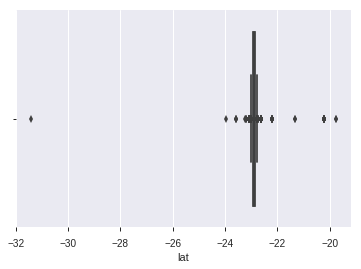

In [256]:
import seaborn as sns

# sns.boxplot(x=df311g.lng)

sns.boxplot(x=df1.lat)

In [ ]:
# REMOVING OUTLIER USING Z-SCORE (Opcional: Rodar apenas para visualizar melhor no mapa do matplotlib)

def remove_outlier(data_1, threshold=3):
    outliers=[]

    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    output = [i for i in data_1 if i not in outliers]
    return output

threshold = 2.5

df1 = df1[df1.lng.isin(remove_outlier(df1.lng, threshold))]
df1 = df1[df1.lat.isin(remove_outlier(df1.lat, threshold))]

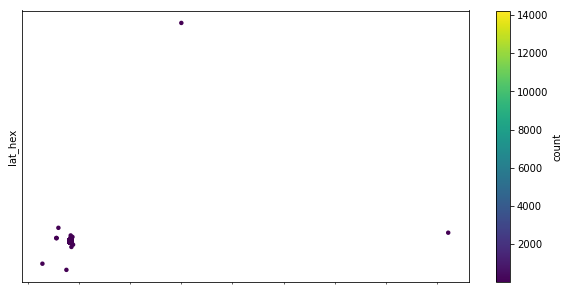

In [10]:
# CREATING HEXAGONS WITH CUSTOMIZED SIZE

from h3 import h3

APERTURE_SIZE = 12
hex_col = 'hex' + str(APERTURE_SIZE)

# Functions
def plot_scatter(df, metric_col, x='lng_hex', y='lat_hex', marker='o', alpha=1, figsize=(17, 15), colormap='viridis'):    
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html
    df.plot.scatter(x=x, y=y, c=metric_col, edgecolors='none', colormap=colormap, marker=marker, alpha=alpha, figsize=figsize);
    plt.xticks([], []); plt.yticks([], [])

# find hexs containing the points
df1[hex_col] = df1.apply(lambda x: h3.geo_to_h3(x.lat_long[0],x.lat_long[1],APERTURE_SIZE), 1)

# aggregate the points
df1_ag = df1.groupby(hex_col).size().to_frame('count').reset_index()

# find center of hex for visualization
df1_ag['lat_hex'] = df1_ag[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
df1_ag['lng_hex'] = df1_ag[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])

# plot the hexs
plot_scatter(df1_ag, metric_col='count', figsize=(10,5))

#print(df1.head())
#print(df1_ag.head())

In [ ]:
# VISUALIZING THE HEXAGONS

from h3 import h3

def visualize_hexagons(hexagons, color="red", folium_map=None, fill= None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color,fill_color=fill)
        m.add_child(my_PolyLine)
    return m

In [ ]:
hexagons = df1_ag[hex_col].tolist()
m = visualize_hexagons(hexagons, color='red', folium_map=brasil)
m.save(path + 'hexagons_plot_data.html')

In [17]:
# ELIMINANDO LINHAS DE ONIBUS COM APENAS 1 SINAL EMITIDO

aux = pd.DataFrame(df1.groupby('LINHA').size()).reset_index()
aux = aux.rename(columns={0:'count'})
include = aux[aux['count']>1]['LINHA']

df1 = df1[df1.LINHA.isin(include)]
df1 = df1.sort_values('DATAHORA')

print(df1.shape)
df1.head()

(1867011, 9)


,DATAHORA,ORDEM,LINHA,lat_long,lat,lng,hex12,shift_lat_long,delta_S
1752919,2016-12-31 00:01:20,D53555,923.0,"(-22.88325, -43.4951)",-22.883249,-43.495098,8ca8a06610105ff,NaN,NaN
1528934,2016-12-31 00:02:35,D86177,864.0,"(-22.90029, -43.55116)",-22.900293,-43.551159,8ca8a0291d903ff,NaN,NaN
404028,2016-12-31 00:02:54,C47599,361.0,"(-23.00052, -43.34208)",-23.000521,-43.342079,8ca8a070b782dff,NaN,NaN
1528935,2016-12-31 00:03:45,D86177,864.0,"(-22.90029, -43.55116)",-22.900293,-43.551159,8ca8a0291d903ff,"(-22.90029, -43.55116)",0.0
1528936,2016-12-31 00:04:20,D86177,864.0,"(-22.90029, -43.55116)",-22.900293,-43.551159,8ca8a0291d903ff,"(-22.90029, -43.55116)",0.0


In [11]:
# FUNÇÃO PARA CALCULAR AS DISTÂNCIAS ENTRE OS SINAIS DE GPS EMITIDOS (AGRUPADO POR LINHA DE ÔNIBUS)

# VECTORIZES HAVERSINE FUNCTION

def haversine2(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    distance_in_meters = earth_radius * (10**3) * 2 * np.arcsin(np.sqrt(a))

    return distance_in_meters

# Ou dá para utilizar a função do pacote do Haversine

#import haversine as hv
#hv.haversine(df1.lat_long[1989351], df1.lat_long[3667807], unit = 'm')

In [12]:
import geopy as geo
from geopy import distance

start = [41.49008, -71.312796]
end = [41.499498, -81.695391]

print(geo.distance.geodesic(start, end).m)

print(haversine2(start[0], start[1], end[0], end[1]))

866455.4329098684
864213.2735075523


In [13]:
# CALCULANDO AS DISTANCIAS (DELTA S) PELO GEODESIC DO GEOPY

df1 = df1.sort_values(['LINHA','DATAHORA'])

grp = df1.groupby('LINHA')

df1['shift_lat_long'] = grp.shift()['lat_long']

lista = []

for i in df1.index:
    if 'n' in str(df1.shift_lat_long[i]).lower():
        lista.append(np.nan)
    else:
        lista.append(geo.distance.geodesic(df1.lat_long[i], df1.shift_lat_long[i]).m)
        
df1['delta_S'] = lista

In [15]:
df1.head()

,DATAHORA,ORDEM,LINHA,lat_long,lat,lng,hex12,shift_lat_long,delta_S
319,2016-12-31 20:59:13,A10,1.0,"(-22.87054, -43.24974)",-22.870543,-43.249741,8ca8a06adb513ff,NaN,NaN
561,2016-12-31 21:15:50,C41896,1.0,"(-22.87023, -43.24931)",-22.870230,-43.249313,8ca8a06adb5e5ff,"(-22.87054, -43.24974)",55.908117
318,2016-12-31 21:21:52,A09,1.0,"(-22.87079, -43.2499)",-22.870787,-43.249897,8ca8a06adb427ff,"(-22.87023, -43.24931)",86.670281
562,2016-12-31 23:58:36,D12120,1.0,"(-22.87092, -43.24917)",-22.870920,-43.249168,8ca8a06adb501ff,"(-22.87079, -43.2499)",76.283259
563,2016-12-31 23:59:06,D12120,1.0,"(-22.87092, -43.24917)",-22.870920,-43.249168,8ca8a06adb501ff,"(-22.87092, -43.24917)",0.000000


In [18]:
# CALCULANDO AS DISTANCIAS (DELTA s) E OS TEMPOS (DELTA T)

df1 = df1.sort_values(['LINHA','DATAHORA'])

grp = df1.groupby('LINHA')

# CALCULANDO DISTANCE TRAVELED
df1['delta_s'] = np.concatenate(grp.apply(lambda x: haversine2(x['lat'], x['lng'], x['lat'].shift(), x['lng'].shift()
                                                              )
                                         ).values
                               )
                                
# CALCULANDO TIME SPENT
df1['delta_t'] = (grp.apply(lambda x: x['DATAHORA'] - x['DATAHORA'].shift()).values)

df1['delta_t'] = df1.apply(lambda x: x['delta_t'].total_seconds(),1).values

#df1['delta_t'] = df1['delta_t'].fillna(pd.Timedelta(seconds=0))
df1['delta_t'] = df1['delta_t'].fillna(0)
df1['delta_s'] = df1['delta_s'].fillna(0)

df1['delta_S'] = df1['delta_S'].fillna(0)

#df1 = df1[df1.delta_s!=0]

In [19]:
df1.head()

,DATAHORA,ORDEM,LINHA,lat_long,lat,lng,hex12,shift_lat_long,delta_S,delta_s,delta_t
319,2016-12-31 20:59:13,A10,1.0,"(-22.87054, -43.24974)",-22.870543,-43.249741,8ca8a06adb513ff,NaN,0.000000,0.000000,0.0
561,2016-12-31 21:15:50,C41896,1.0,"(-22.87023, -43.24931)",-22.870230,-43.249313,8ca8a06adb5e5ff,"(-22.87054, -43.24974)",55.908117,55.983481,997.0
318,2016-12-31 21:21:52,A09,1.0,"(-22.87079, -43.2499)",-22.870787,-43.249897,8ca8a06adb427ff,"(-22.87023, -43.24931)",86.670281,86.116071,362.0
562,2016-12-31 23:58:36,D12120,1.0,"(-22.87092, -43.24917)",-22.870920,-43.249168,8ca8a06adb501ff,"(-22.87079, -43.2499)",76.283259,76.138429,9404.0
563,2016-12-31 23:59:06,D12120,1.0,"(-22.87092, -43.24917)",-22.870920,-43.249168,8ca8a06adb501ff,"(-22.87092, -43.24917)",0.000000,0.000000,30.0


In [20]:
# CALCULANDO AS ÁREAS DOS HEXÁGONOS E O TAMANHO DAS JANELAS DE TEMPO QUE DEVEM SER CONSIDERADAS

from shapely.geometry.polygon import Polygon

df1['area_hexagon'] = df1.apply(lambda x: Polygon(h3.h3_to_geo_boundary(x[hex_col])).area,1) # o tamanho hex_col já foi definido anteriormente

grou = df1.groupby([pd.Grouper(freq='10min', key='DATAHORA'), hex_col]) # GROUP BY POR JANELA DE TEMPO e HEXAGONOS

graf = grou.agg({'delta_S': 'sum', 'delta_t': 'sum', 'area_hexagon':'first', 'LINHA':'nunique'})

graf = graf[graf.delta_S!=0]

graf = graf.reset_index()

from sklearn import preprocessing

"""
graf = graf[graf.speed != np.inf]

dens = np.array([graf.LINHA/graf.area_hexagon])
vel = np.array([graf.speed])

graf['density'] = preprocessing.normalize([dens][0])[0]
graf['speed'] = preprocessing.normalize([vel][0])[0]

graf = graf[['density', 'speed']]
graf.head()
"""

"\ngraf = graf[graf.speed != np.inf]\n\ndens = np.array([graf.LINHA/graf.area_hexagon])\nvel = np.array([graf.speed])\n\ngraf['density'] = preprocessing.normalize([dens][0])[0]\ngraf['speed'] = preprocessing.normalize([vel][0])[0]\n\ngraf = graf[['density', 'speed']]\ngraf.head()\n"

In [21]:
graf.head(5)

,DATAHORA,hex12,delta_S,delta_t,area_hexagon,LINHA
0,2016-12-31 03:50:00,8ca8a061b28d9ff,165.440311,14.0,2.780512e-08,1
1,2016-12-31 03:50:00,8ca8a061b2a97ff,67.627627,53.0,2.780502e-08,1
2,2016-12-31 03:50:00,8ca8a061b2d51ff,17.748383,28.0,2.780539e-08,1
3,2016-12-31 03:50:00,8ca8a061b2d59ff,95.084988,81.0,2.780535e-08,1
4,2016-12-31 03:50:00,8ca8a061b2d5bff,249.877302,68.0,2.780538e-08,1


In [22]:
graf['Q_i'] = graf.delta_S/(5*graf.area_hexagon*1e8) # DENSITY
graf['K_i'] = graf.delta_t/(5*graf.area_hexagon*1e8) # FLOW

# A method to estimate the macroscopic fundamental diagram using limited mobile probe data

#graf['Q_i'] = graf.delta_s/(5*100)
#graf['K_i'] = graf.delta_t/(5*100)

In [23]:
graf.head()

,DATAHORA,hex12,delta_S,delta_t,area_hexagon,LINHA,Q_i,K_i
0,2016-12-31 03:50:00,8ca8a061b28d9ff,165.440311,14.0,2.780512e-08,1,11.899988,1.007009
1,2016-12-31 03:50:00,8ca8a061b2a97ff,67.627627,53.0,2.780502e-08,1,4.864419,3.812261
2,2016-12-31 03:50:00,8ca8a061b2d51ff,17.748383,28.0,2.780539e-08,1,1.276614,2.013998
3,2016-12-31 03:50:00,8ca8a061b2d59ff,95.084988,81.0,2.780535e-08,1,6.839331,5.826217
4,2016-12-31 03:50:00,8ca8a061b2d5bff,249.877302,68.0,2.780538e-08,1,17.973306,4.891140


In [24]:
grou2 = graf.groupby([hex_col, 'DATAHORA'])
graf2 = grou2.agg({'Q_i': 'sum', 'delta_t': 'sum', 'area_hexagon':'sum'})

In [25]:
def f_mi(x):
    """
    Gera as variáveis de fluxo (Q), densidade (K) e velocidade (V)"""
    d = []
    d.append( ( (x['area_hexagon'] * x['Q_i']).sum() ) / ( x['area_hexagon'].sum() ) ) 
    d.append( ( (x['area_hexagon'] * x['K_i']).sum() ) / ( x['area_hexagon'].sum() ) ) 
    d.append( (( (x['area_hexagon'] * x['Q_i']).sum() ) / ( x['area_hexagon'].sum() )) / (( (x['area_hexagon'] * x['K_i']).sum() ) / ( x['area_hexagon'].sum() )) ) 
    return pd.Series(d, index=['Q', 'K', 'V'])

In [26]:
graf2 = graf.groupby(['DATAHORA']).apply(f_mi)
graf2.head()

,Q,K,V
DATAHORA,,,
2016-12-31 03:50:00,7.577628,15.496023,0.489005
2016-12-31 04:00:00,788.487240,6.408730,123.033303
2016-12-31 05:30:00,2.816365,1177.286036,0.002392
2016-12-31 06:20:00,3.051847,12.956193,0.235551
2016-12-31 07:40:00,117.716845,1135.197373,0.103697


In [26]:
# CRIANDO COLUNA COM TURNO

conditions = [
    (graf2.index.hour > 7) & (graf2.index.hour < 12),
    (graf2.index.hour > 14) & (graf2.index.hour < 19)]

choices = ['manha','tarde']

graf2['turno'] = np.select(conditions, choices, default='outro')
print(graf2.shape)
graf2.head()

(233, 4)


,Q,K,V,turno
DATAHORA,,,,
2016-12-31 03:50:00,7.523054,15.496023,0.485483,outro
2016-12-31 04:00:00,788.487240,6.408730,123.033303,outro
2016-12-31 05:30:00,2.816365,1177.286036,0.002392,outro
2016-12-31 06:20:00,3.051847,12.956193,0.235551,outro
2016-12-31 07:40:00,117.716845,1135.197373,0.103697,outro


In [27]:
gr = graf2.reset_index()

gr['time'] = gr.apply(lambda x: x['DATAHORA'].time(),1)

gr = gr.reset_index(drop=1)

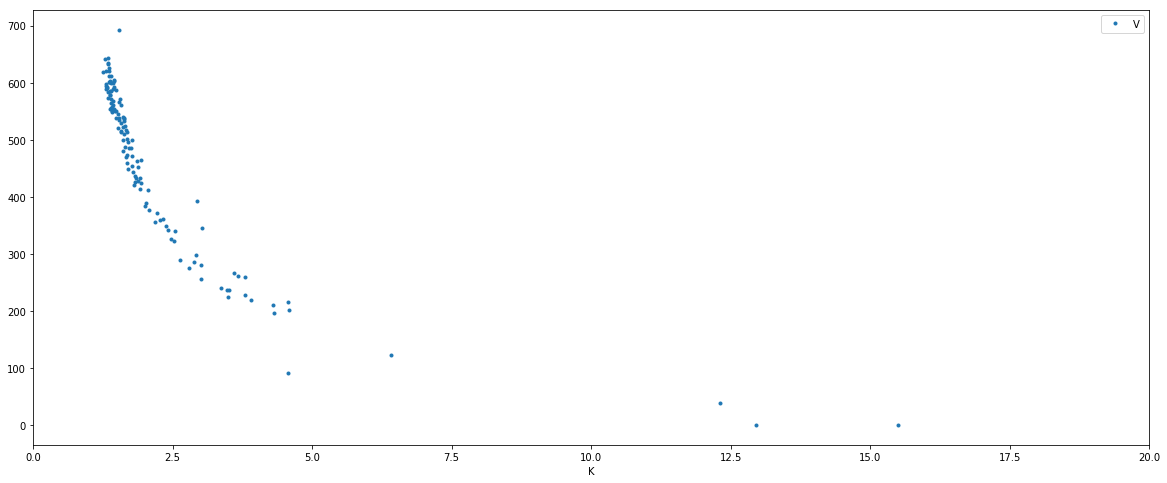

In [49]:
xlim = [0, 20]
ylim = [0, 700]

fig, ax = plt.subplots()
bp = graf2.plot(ax=ax, x='K', y='V', style='.', figsize=(20,8), alpha=1, xlim=xlim, ylim=None)
#bp = gr.plot(ax=ax, x='V', y='K', style='.', figsize=(20,8), alpha=1)

#bp = graf2.groupby('turno').plot(ax=ax, x="V", y="K", style='.', figsize=(20,8), alpha=1)

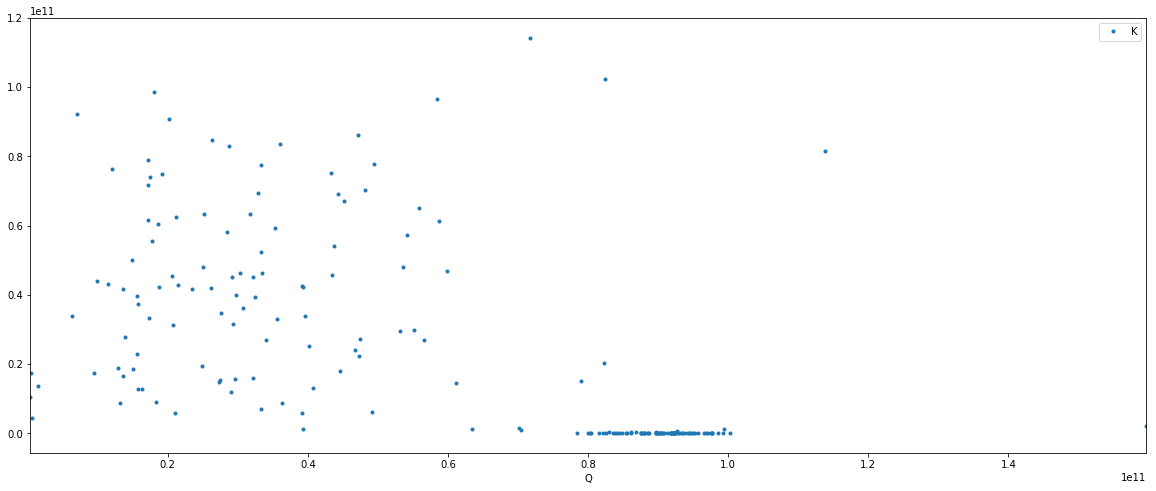

In [33]:
# PERÍODO DE 15 MINUTOS, HEX12

xlim = [0, .019e11]
ylim = [0, 1200]

fig, ax = plt.subplots()
#bp = graf2.plot(ax=ax, x='K', y='Q', style='.', figsize=(20,8), alpha=1, xlim=xlim, ylim=ylim)
bp = graf2.plot(ax=ax, x='Q', y='K', style='.', figsize=(20,8), alpha=1)

#bp = graf.groupby('turno').plot(ax=ax, x='density', y='VELOCIDADE', style='.', figsize=(20,8), alpha=1)

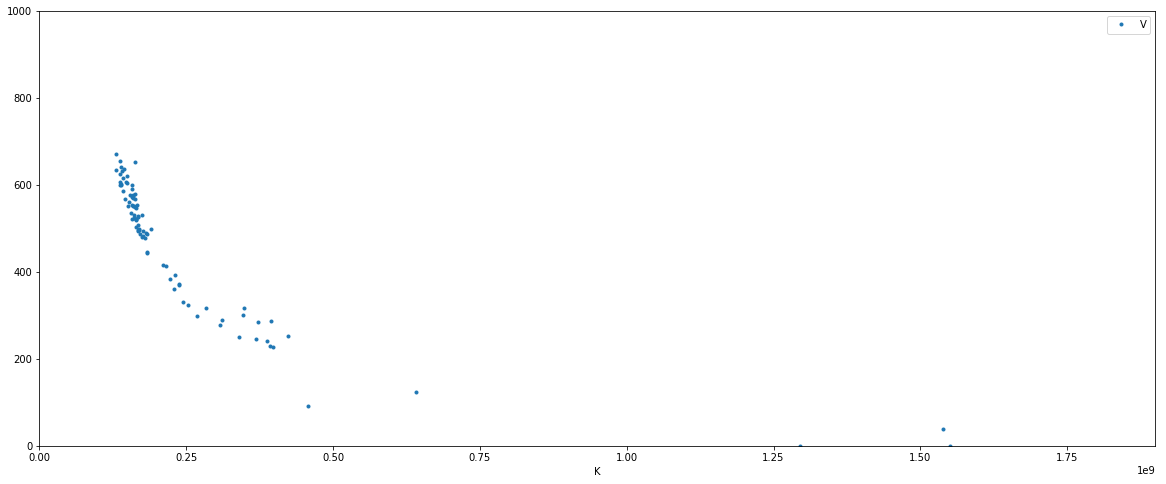

In [50]:
# PERÍODO DE 15 MINUTOS, HEX12

xlim = [0, .019e11]
ylim = [0, 1000]

fig, ax = plt.subplots()
bp = graf2.plot(ax=ax, x='K', y='V', style='.', figsize=(20,8), alpha=1, xlim=xlim, ylim=ylim)
#bp = graf2.plot(ax=ax, x='K', y='V', style='.', figsize=(20,8), alpha=1)

#bp = graf.groupby('turno').plot(ax=ax, x='density', y='VELOCIDADE', style='.', figsize=(20,8), alpha=1)

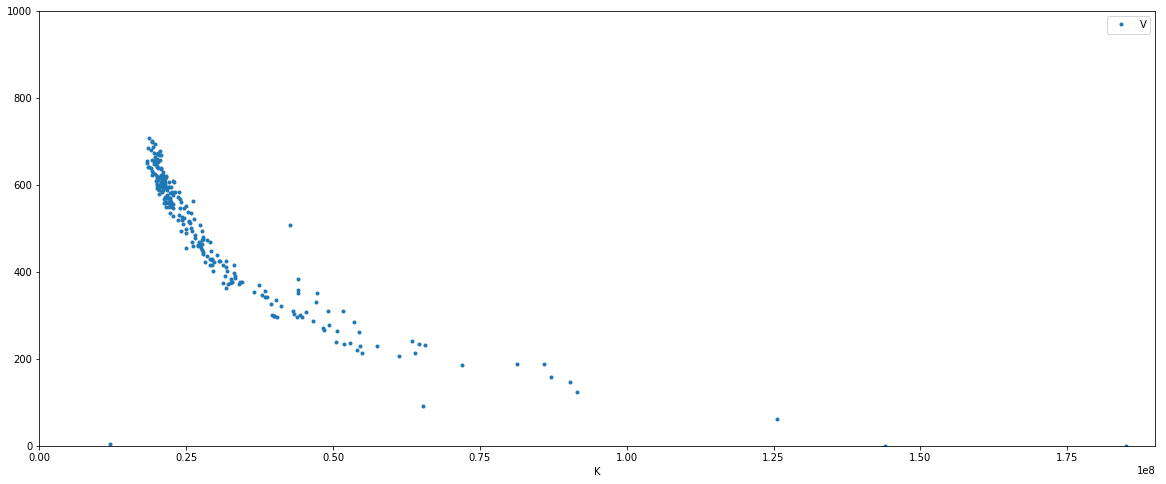

In [18]:
# PERÍODO DE 5 MINUTOS, HEX11

xlim = [0, .019e10]
ylim = [0, 1000]

fig, ax = plt.subplots()
bp = graf2.plot(ax=ax, x='K', y='V', style='.', figsize=(20,8), alpha=1, xlim=xlim, ylim=ylim)
#bp = graf2.plot(ax=ax, x='K', y='Q', style='.', figsize=(20,8), alpha=1)

#bp = graf.groupby('turno').plot(ax=ax, x='density', y='VELOCIDADE', style='.', figsize=(20,8), alpha=1)